In [28]:
#drop player that is out

In [29]:
import pandas as pd 
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [30]:
dates = [
    ['2_4', '2020-02-04'],
    ['2_3', '2020-02-03'],
    ['2_2', '2020-02-02'],
    ['2_1', '2020-02-01'],
    ['1_31', '2020-01-31'],
    ['1_30', '2020-01-30'],
    ['1_29', '2020-01-29'],
    ['1_28', '2020-01-28'],
    ['1_27', '2020-01-27'],
    ['1_26', '2020-01-26'],
    ['1_25', '2020-01-25'],
    ['1_24', '2020-01-24'],
    ['1_23', '2020-01-23'],
    ['1_22', '2020-01-22'],
    ['1_20', '2020-01-20'],
    ['1_19', '2020-01-19'],
    ['1_18', '2020-01-18'],
    ['1_17', '2020-01-17'],
    ['1_16', '2020-01-16'],
    ['1_15', '2020-01-15'],
    ['1_14', '2020-01-14'],
    ['1_13', '2020-01-13'],
    ['1_12', '2020-01-12'],
    ['1_11', '2020-01-11'],
    ['1_10', '2020-01-10'],
    ['1_9', '2020-01-09'],
    ['1_8', '2020-01-08'],
    ['1_7', '2020-01-07'],
    ['1_6', '2020-01-06'],
    ['1_5', '2020-01-05'],
    ['1_4', '2020-01-04'],
    ['1_3', '2020-01-03'],
    ['1_2', '2020-01-02'],
    ['1_1', '2020-01-01'],
    ['12_31', '2019-12-31'],
    ['12_30', '2019-12-30'],
    ['12_29', '2019-12-29'],
    ['12_28', '2019-12-28'],
    ['12_27', '2019-12-27'],
    ['12_26', '2019-12-26'],
    ['12_25', '2019-12-25'],
    ['12_23', '2019-12-23'],
    ['12_22', '2019-12-22'],
    ['12_21', '2019-12-21'],
    ['12_20', '2019-12-20'],
    ['12_19', '2019-12-19'],
    ['12_18', '2019-12-18'],
    ['12_17', '2019-12-17'],
    ['12_16', '2019-12-16'],
    ['12_15', '2019-12-15'],
    ['12_14', '2019-12-14'],
    ['12_13', '2019-12-13'],
    ['12_12', '2019-12-12'],
    ['12_11', '2019-12-11'],
    ['12_10', '2019-12-10'],
    ['12_9', '2019-12-09'],
    ['12_8', '2019-12-08'],
    ['12_7', '2019-12-07'],
    ['12_6', '2019-12-06'],
    ['12_5', '2019-12-05'],
    ['12_4', '2019-12-04'],
    ['12_3', '2019-12-03'],
    ['12_2', '2019-12-02'],
    ['12_1', '2019-12-01'],
    ['11_30', '2019-11-30'],
    ['11_29', '2019-11-29'],
    ['11_27', '2019-11-27'],
    ['11_26', '2019-11-26'],
    ['11_25', '2019-11-25'],
    ['11_24', '2019-11-24'],
    ['11_23', '2019-11-23'],
    ['11_22', '2019-11-22'],
    ['11_21', '2019-11-21'],
    ['11_20', '2019-11-20'],
    ['11_19', '2019-11-19'],
    ['11_18', '2019-11-18'],
    ['11_17', '2019-11-17'],
    ['11_16', '2019-11-16'],
    ['11_15', '2019-11-15'],
    ['11_14', '2019-11-14'],
    ['11_13', '2019-11-13'],
    ['11_12', '2019-11-12'],
    ['11_11', '2019-11-11'],
    ['11_10', '2019-11-10'],
    ['11_9', '2019-11-09'],
    ['11_8', '2019-11-08'],
    ['11_7', '2019-11-07'],
    ['11_6', '2019-11-06'],
    ['11_5', '2019-11-05'],
    ['11_4', '2019-11-04'],
    ['11_3', '2019-11-03'],
    ['11_2', '2019-11-02'],
    ['11_1', '2019-11-01'],
    ['10_31', '2019-10-31'],
    ['10_30', '2019-10-30'],
    ['10_29', '2019-10-29'],
    ['10_28', '2019-10-28'],
    ['10_27', '2019-10-27'],
    ['10_26', '2019-10-26'],
    ['10_25', '2019-10-25'],
    ['10_24', '2019-10-24'],
    ['10_23', '2019-10-23'],
    ['10_22', '2019-10-22'],   
]

drop_attribs = [
        'DFN_PPGProj',
        'FantasyFuelPPGProj',
        'DFN_ValueProj',
        'FantasyFuelValueProj',
        'L2 Min',
        'L5 Min',
        'S Min',
        
]

def reduceForProjectionAnalysis(file):
    file['Avg Proj'] = (file['DFN_PPGProj']+file['FantasyFuelPPGProj'])/2
    file['Avg Value Proj'] = ((file['DFN_ValueProj']+file['FantasyFuelValueProj'])/2)
    file['Avg Skewed Min'] = ((file['L2 Min']+file['L5 Min']+file['S Min'])/3)
    file['Avg Skewed FGA'] = ((file['L2 FGA']+file['L5 FGA']+file['S FGA'])/3)
    file['Avg Skewed FP'] = ((file['L5 FP']+file['S FP']+file['Ceil FP']+file['Floor FP']+file['Avg Proj'])/5)
    file['Avg L5 PPG'] = ((file['L5_ppg_floor']+file['L5_ppg_avg']+file['L5_ppg_max'])/3)
    file.drop(drop_attribs, axis=1, inplace=True)
    file = file[file['injury_status'] != 'O']
    return file

def dropLowScoringLineups(file):
    drop_level = file.groupby(['Lineup Num'])['Actual FP'].sum().mean() - file.groupby(['Lineup Num'])['Actual FP'].sum().std()
    group = file.groupby(['Lineup Num'])
    return group.filter(lambda x: x['Actual FP'].sum() > drop_level)

def addPlayerOccurences(file):
    file['Selected'] = np.nan
    values = file['Player Name'].value_counts().keys().tolist()
    counts = file['Player Name'].value_counts().tolist()
    for i in range(len(values)):
        file.loc[file['Player Name'] == values[i],['Selected']] = counts[i]
    file['Selected'].fillna(0, inplace=True)
    file = file.reset_index().drop(['Lineup Num', 'Unnamed: 1' ], axis=1)
    file.drop_duplicates(subset ="Player Name", keep = 'first', inplace = True) 
    return file
    



date = dates[1][1]
file_name = 'BestLineups/{}'.format(date)
best_lineups_file = pd.read_csv(file_name,index_col=[0,1], skipinitialspace=True)
df = addPlayerOccurences(dropLowScoringLineups(reduceForProjectionAnalysis(best_lineups_file.copy())))

def dropLowScoringPlayers(file):
    file = file.reset_index().drop(['Lineup Num' ], axis=1)
    file.drop_duplicates(subset ="Player Name", keep = 'first', inplace = True) 
    drop_level = file['Actual FP'].mean() - file['Actual FP'].std()
    return file[file.apply(lambda  x: x['Actual FP'] > drop_level, axis=1)]


In [34]:
def dropLowScoringLineups(file):
    drop_level = file.groupby(['Lineup Num'])['Actual FP'].sum().mean() - file.groupby(['Lineup Num'])['Actual FP'].sum().std()
    group = file.groupby(['Lineup Num'])
    return group.filter(lambda x: x['Actual FP'].sum() > drop_level)    

In [35]:
def findUniquePlayers():
    unique_players = []
    for date in dates:
        file_name = 'BestLineups/{}'.format(date[1])
        best_lineups_file = dropLowScoringLineups(pd.read_csv(file_name,index_col=[0,1], skipinitialspace=True))
        unique_players.append(len(set(best_lineups_file['Player Name'].value_counts().keys().tolist())))
    return unique_players

def findTotalPlayers():
    total_players = []
    for date in dates:
        file_name = 'HistoricalData_Merged/{}'.format(date[1])
        all_lineups_file =  pd.read_csv(file_name)
        total_players.append(len(set(all_lineups_file['Player Name'].value_counts().keys().tolist())))
    return total_players

def findRepresentedTeams():
    represented_teams = []
    for date in dates:
        file_name = 'BestLineups/{}'.format(date[1])
        best_lineups_file =  dropLowScoringLineups(pd.read_csv(file_name,index_col=[0,1], skipinitialspace=True))
        represented_teams.append(len(set(best_lineups_file['team'].value_counts().keys().tolist())))
    return represented_teams

def findTotalTeams():
    total_teams = []
    for date in dates:
        file_name = 'HistoricalData_Merged/{}'.format(date[1])
        all_lineups_file =  pd.read_csv(file_name)
        total_teams.append(len(set(all_lineups_file['team'].value_counts().keys().tolist())))
    return total_teams
    
def findSelectionRate(unique_players, total_players):
    avg_select_rate = []
    for i in range(len(unique_players)):
        avg_select_rate.append((unique_players[i]/total_players[i])*100)
    return avg_select_rate

def findMeanProjPointBest():
    mean_proj = []
    for date in dates:
        file_name = 'BestLineups/{}'.format(date[1])
        best_lineups_file =  dropLowScoringLineups(pd.read_csv(file_name,index_col=[0,1], skipinitialspace=True))
        avg_proj = (best_lineups_file['FantasyFuelPPGProj'] + best_lineups_file['DFN_PPGProj']) / 2
        mean_proj.append(avg_proj.mean())
    return mean_proj

def findMeanProjValueBest():
    mean_proj = []
    for date in dates:
        file_name = 'BestLineups/{}'.format(date[1])
        best_lineups_file =  dropLowScoringLineups(pd.read_csv(file_name,index_col=[0,1], skipinitialspace=True))
        avg_proj = (best_lineups_file['FantasyFuelValueProj'] + best_lineups_file['DFN_ValueProj']) / 2
        mean_proj.append(avg_proj.mean())
    return mean_proj

def findMeanProjMinBest():
    mean_proj = []
    for date in dates:
        file_name = 'BestLineups/{}'.format(date[1])
        best_lineups_file = dropLowScoringLineups( pd.read_csv(file_name,index_col=[0,1], skipinitialspace=True) )
        avg_proj = best_lineups_file['DFN_MinProj']
        mean_proj.append(avg_proj.mean())
    return mean_proj

def findMeanProjPointTotal():
    mean_proj = []
    for date in dates:
        file_name = 'HistoricalData_Merged/{}'.format(date[1])
        all_lineups_file =  pd.read_csv(file_name)
        avg_proj = (all_lineups_file['ppg_projection'] + all_lineups_file['Proj FP']) / 2
        mean_proj.append(avg_proj.mean())
    return mean_proj 

def findMeanProjValueTotal():
    mean_proj = []
    for date in dates:
        file_name = 'HistoricalData_Merged/{}'.format(date[1])
        all_lineups_file =  pd.read_csv(file_name)
        avg_proj = (all_lineups_file['value_projection'] + all_lineups_file['Proj Val']) / 2
        mean_proj.append(avg_proj.mean())
    return mean_proj 

def findMeanProjMinTotal():
    mean_proj = []
    for date in dates:
        file_name = 'HistoricalData_Merged/{}'.format(date[1])
        all_lineups_file =  pd.read_csv(file_name)
        avg_proj = all_lineups_file['Proj Min'] 
        mean_proj.append(avg_proj.mean())
    return mean_proj 

def comparePlayerSelectionRate():
    unique_players = findUniquePlayers()
    total_players = findTotalPlayers()
    represented_teams = findRepresentedTeams()
    total_teams = findTotalTeams()
    avg_select_rate = findSelectionRate(unique_players, total_players)
    mean_proj_best = findMeanProjPointBest()
    mean_proj_total = findMeanProjPointTotal()
    mean_proj_val_best = findMeanProjValueBest()
    mean_proj_val_total = findMeanProjValueTotal()
    mean_proj_min_best = findMeanProjMinBest()
    mean_proj_min_total = findMeanProjMinTotal()
    df = pd.DataFrame({'total players': total_players,
                       'unique players': unique_players, 
                       'selection rate': avg_select_rate, 
                       'represented teams': represented_teams, 
                       'total teams' : total_teams, 
                       'mean proj point best': mean_proj_best,
                       'mean proj value best': mean_proj_val_best,
                       'mean proj min best': mean_proj_min_best,
                       'mean proj point total': mean_proj_total,
                       'mean proj value total': mean_proj_val_total,
                       'mean proj min total': mean_proj_min_total,})
    return df


def plotSelectionRateVSTotal(df):
    df.plot.scatter(x='selection rate',
                      y='total players',
                      c='DarkBlue')
    
def plotRepresentedTeamsVSTotal(df):
    df.plot.scatter(x='represented teams',
                      y='total teams',
                      c='DarkBlue')
    
def plotMeanProjPointBest(df):
    df['mean proj point best'].plot(kind='box')
    
def plotMeanProjPointTotal(df):
    df['mean proj point total'].plot(kind='box')
    
def plotMeanProjValueBest(df):
    df['mean proj value best'].plot(kind='box')
    
def plotMeanProjValueTotal(df):
    df['mean proj value total'].plot(kind='box')
    
def plotMeanProjMinBest(df):
    df['mean proj min best'].plot(kind='box')
    
def plotMeanProjMinTotal(df):
    df['mean proj min total'].plot(kind='box')


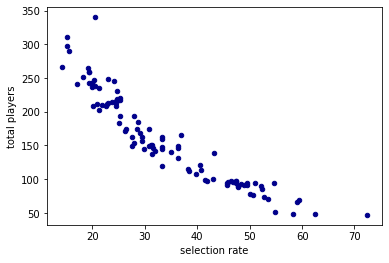

In [36]:
player_selection_df = comparePlayerSelectionRate()
plotSelectionRateVSTotal(player_selection_df)

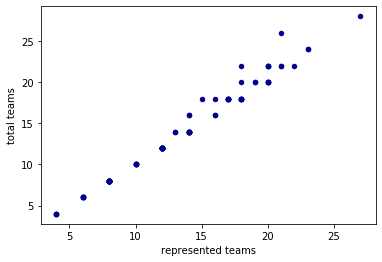

In [37]:
plotRepresentedTeamsVSTotal(player_selection_df)

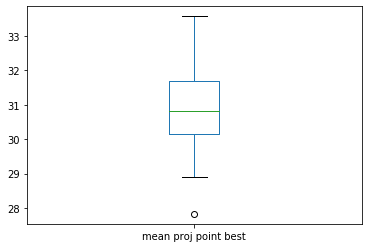

In [38]:
plotMeanProjPointBest(player_selection_df)

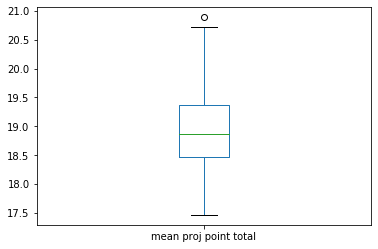

In [39]:
plotMeanProjPointTotal(player_selection_df)

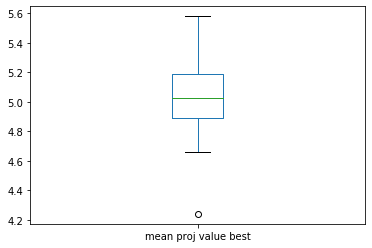

In [40]:
plotMeanProjValueBest(player_selection_df)

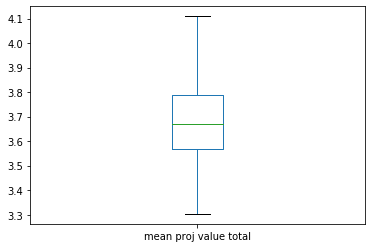

In [41]:
plotMeanProjValueTotal(player_selection_df)

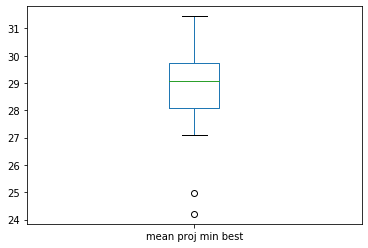

In [42]:
plotMeanProjMinBest(player_selection_df)

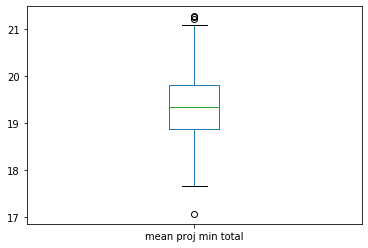

In [43]:
plotMeanProjMinTotal(player_selection_df)

In [44]:
player_selection_df

,total players,unique players,selection rate,represented teams,total teams,mean proj point best,mean proj value best,mean proj min best,mean proj point total,mean proj value total,mean proj min total
0,94,48,51.063830,8,8,33.225184,5.362353,30.612132,19.530319,3.746383,19.271277
1,235,50,21.276596,20,20,33.098485,5.441174,30.270833,18.918511,3.693426,19.387234
2,78,39,50.000000,6,6,32.721552,5.384634,27.706897,17.678205,3.368654,17.064103
3,210,46,21.904762,17,18,29.393750,4.820375,28.844643,19.163571,3.731190,19.695238
4,175,54,30.857143,14,14,32.468182,5.315871,29.405303,18.464571,3.614714,18.545714
...,...,...,...,...,...,...,...,...,...,...,...
98,211,48,22.748815,18,18,31.252390,5.097537,28.869485,18.938626,3.776303,19.308057
99,213,49,23.004695,17,18,31.517742,5.004456,28.054435,19.000704,3.817066,19.288732
100,69,41,59.420290,6,6,31.056250,4.891552,27.573276,19.226812,3.712246,19.057971
101,248,57,22.983871,21,22,31.069318,5.078409,29.732955,19.372177,3.766109,19.713710
